In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from scipy import sparse
from Constants import *
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None) #Print full text
pd.set_option('display.max_rows', 1000) #Print full text

### Compute overall statistic on newspapers and speakers
Important: no threshold has been applied on speaker

In [25]:
df = pd.read_csv(NEWSPAPER_SPEAKER_COUNT_FILE,compression='bz2')
df.columns

Index(['newspaper', 'speaker', 'count'], dtype='object')

In [9]:
print(f'They are {len(df)} pairs of (newspapers,speakers)')
newspapers = set(df['newspaper'])
print(f'They are {len(newspapers)} unique newspapers')
speakers = set(df['speaker'])
print(f'They are {len(speakers)} unique speakers')

They are 2434410 pairs of (newspapers,speakers)
They are 7362 unique newspapers
They are 212146 unique speakers


In [10]:
speaker_unique_occurence = df[['newspaper','speaker']].groupby('speaker',as_index=False).count()\
                    .rename(columns = {'newspaper':'unique_newspaper_quotes'})

In [11]:
speaker_unique_occurence.nlargest(100,columns=['unique_newspaper_quotes'])

,speaker,unique_newspaper_quotes
149814,none,6999
161395,president donald trump,2836
161405,president trump,2034
194583,tedros adhanom ghebreyesus,1954
24574,boris johnson,1890
20952,bernie sanders,1816
14547,anthony fauci,1755
10674,andrew cuomo,1707
94541,joe biden,1683
145222,nancy pelosi,1665


As we can see, we will have to merge speakers named `X`, `Mr X`, `President X`... or `<title> X` in general.  
We may also have to merge people who are sometimes addressed only by their second name, and sometimes both their first and second names.  
Solution: id rather than name.

In [12]:
speaker_unique_occurence.describe()

,unique_newspaper_quotes
count,212146.000000
mean,11.475163
std,44.151353
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,6999.000000


In [13]:
speaker_total_occurence = df.groupby('speaker',as_index=False).aggregate({'count':'sum'})\
                                .rename(columns = {'count':'total_newspaper_quotes'})

In [24]:
speaker_total_occurence.nlargest(16000,columns=['total_newspaper_quotes'])

,speaker,total_newspaper_quotes
149814,none,5857313
161395,president donald trump,261722
24574,boris johnson,86315
94541,joe biden,84953
20952,bernie sanders,69722
...,...,...
69736,gerry murphy,97
70782,glenn martin,97
70938,glyn hodges,97
71484,gracie elvin,97


In [15]:
speaker_total_occurence.describe()

,total_newspaper_quotes
count,2.121460e+05
mean,8.040466e+01
std,1.274325e+04
min,1.000000e+00
25%,2.000000e+00
50%,6.000000e+00
75%,1.900000e+01
max,5.857313e+06


In [16]:
newspaper_speaker_count = df.groupby('newspaper',as_index=False).aggregate({'speaker':'count'})\
                            .rename(columns = {'speaker':'speaker_count'})

In [17]:
newspaper_speaker_count.nlargest(100,columns=['speaker_count'])

,newspaper,speaker_count
4055,msn,16544
784,breitbart,9434
6872,washingtontimes,9239
5439,sfgate,8864
2954,indiatimes,7304
4518,nytimes,7277
5405,seattletimes,6951
2938,independent,6501
5686,stamfordadvocate,6426
890,businessinsider,6422


In [18]:
newspaper_speaker_count.describe()

,speaker_count
count,7362.000000
mean,330.672372
std,799.103581
min,1.000000
25%,11.000000
50%,53.000000
75%,218.000000
max,16544.000000


In [19]:
newspaper_quote_count = df.groupby('newspaper',as_index=False).aggregate({'count':'sum'})\
                        .rename(columns={'count':'quote_count'})

In [20]:
newspaper_quote_count.describe()

,quote_count
count,7362.000000
mean,2316.969302
std,7791.179536
min,1.000000
25%,34.000000
50%,221.500000
75%,1117.500000
max,267567.000000


### Thresholding decisions

If we keep everything, the newspaper-speaker_count matrix will be of size:  
newspapers_count x speaker_count = 7148 x 218 413 = 1 561 216 124 which is huge even though the obtained matrix will be sparse.  
We must decide which newspaper to keep  
We must decide which speakers to keep  
We decide probability threshold for a speaker to be correctly attributed to a quote.  

### Preliminary clustering on the speaker-newspaper matrix using t-SNE

In [4]:
newspaper_speaker_tfidf = sparse.load_npz(FILE_NEWSPAPER_SPEAKER_TFIDF)
X = newspaper_speaker_tfidf.toarray()
X.shape

(7362, 218414)

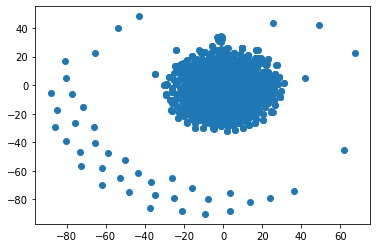

In [21]:
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
X_red = X[:2000] #Use a subset of newspapers
distance_matrix = pairwise_distances(X_red, metric='cosine')
embeddings = TSNE(n_components=2,metric='precomputed',square_distances=True)
Y = embeddings.fit_transform(distance_matrix)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

As we can see, using t-SNE with a subset of the newspaper is computationaly feasible on commodity machines (this code takes 30s to compute).